In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# load scraped data
df_raw = pd.read_csv('../data/Personal_Movies_Ratings_Features.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UID                         339 non-null    int64  
 1   My_Rating                   339 non-null    float64
 2   Budget                      329 non-null    object 
 3   Cumulative_Worldwide_Gross  302 non-null    object 
 4   Production_Company1         339 non-null    object 
 5   Synopsis                    331 non-null    object 
 6   Top_250_Rank                75 non-null     float64
 7   Country1                    339 non-null    object 
 8   Director1                   339 non-null    object 
 9   Genre1                      339 non-null    object 
 10  Genre2                      314 non-null    object 
 11  Genre3                      246 non-null    object 
 12  Rating                      339 non-null    float64
 13  Runtime                     339 non

# Visualize Missing Data

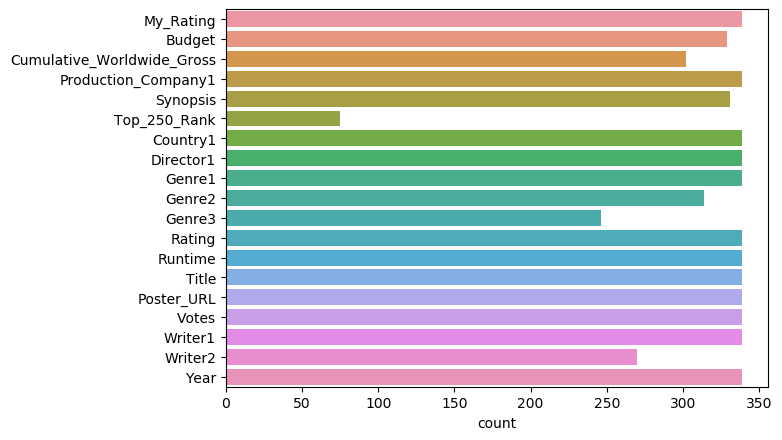

In [4]:
# visualize missing data
df_var_counts = pd.DataFrame(df_raw.groupby('UID').count().sum().reset_index())
df_var_counts.columns = ['var', 'count']
sns.barplot(x='count', y='var', data=df_var_counts)
plt.ylabel('')
plt.show()

# Ratings

In [5]:
df_raw.My_Rating.describe()

count    339.000000
mean       3.666667
std        0.892661
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: My_Rating, dtype: float64

# Correlation between IMDb rating and personal rating?

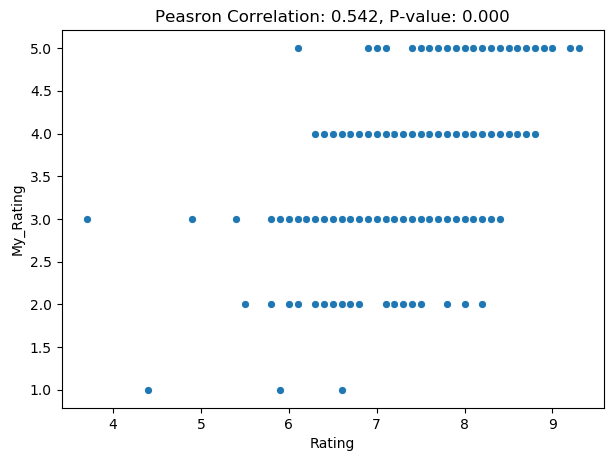

In [6]:
sns.scatterplot(x='Rating', y='My_Rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.Rating, df_raw.My_Rating))
plt.show()

# How many genres?

In [7]:
genres_all = pd.concat((df_raw.Genre1, df_raw.Genre2, df_raw.Genre3)).reset_index(drop=True)
genres_set = set(genres_all)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 nan}

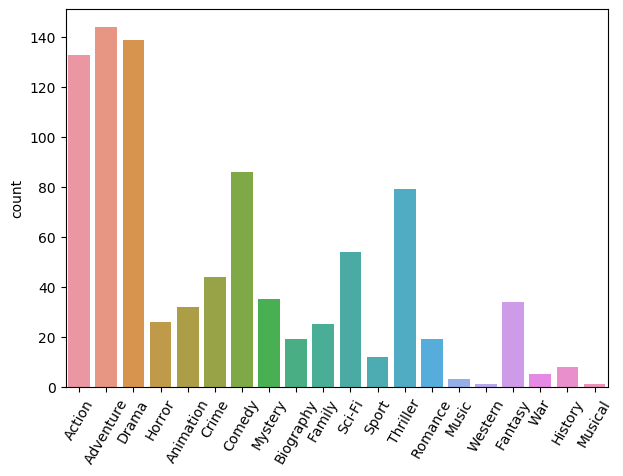

In [8]:
sns.countplot(genres_all)
plt.xticks(fontsize=10, rotation=60)
plt.show()

# Runtimes

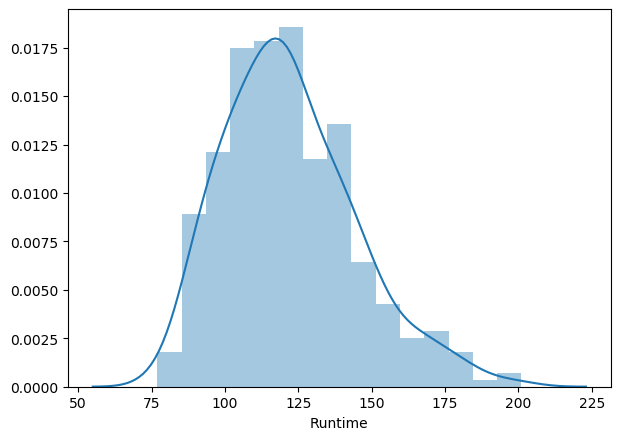

In [9]:
sns.distplot(df_raw.Runtime)
plt.show()

## Correlation between runtime and rating?

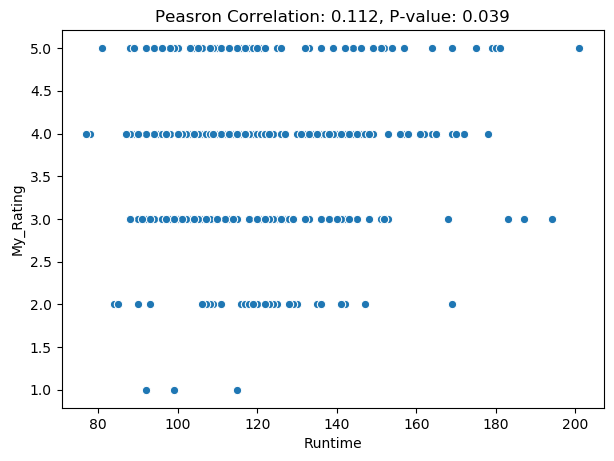

In [10]:
sns.scatterplot(x='Runtime', y='My_Rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.Runtime, df_raw.My_Rating))
plt.show()

## Correlation between votes and rating?

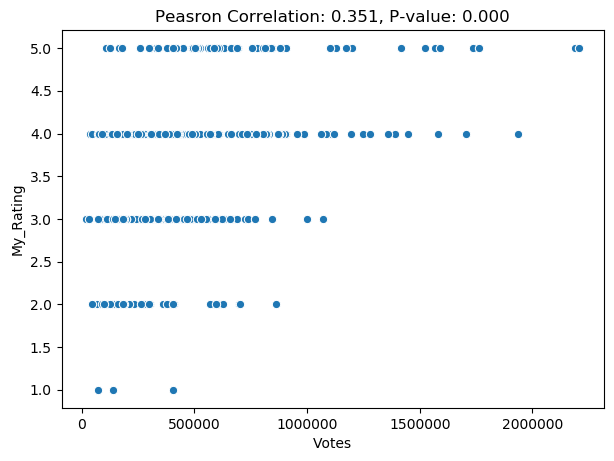

In [11]:
sns.scatterplot(x='Votes', y='My_Rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.Votes, df_raw.My_Rating))
plt.show()

# How many countries?

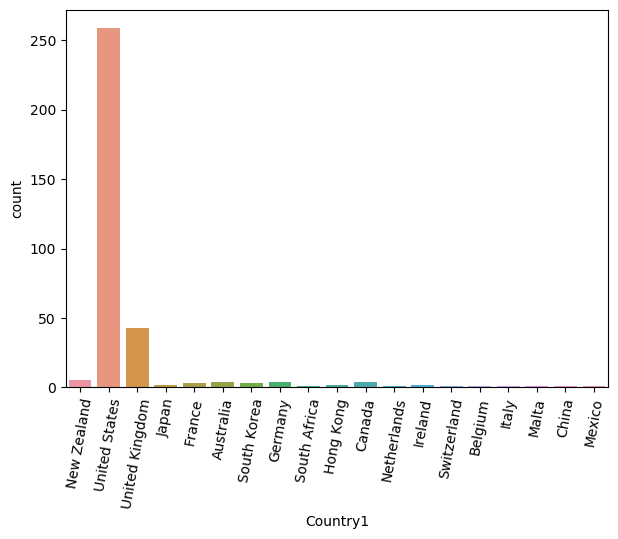

In [12]:
sns.countplot(df_raw.Country1)
plt.xticks(fontsize=10, rotation=80)
plt.show()

# Budget

* JPY:USD - 0.0093
* EUR:USD - 1.09
* GBP:USD - 1.16
* FRF:UDS - 7.16

In [13]:
# define currency foreign exchange rate
df_raw.loc[:, 'forex'] = 1.0
df_raw.loc[df_raw.Budget.str.contains('JPY', na=False), 'forex'] = 0.0093
df_raw.loc[df_raw.Budget.str.contains('EUR', na=False), 'forex'] = 1.09
df_raw.loc[df_raw.Budget.str.contains('GBP', na=False), 'forex'] = 1.16
df_raw.loc[df_raw.Budget.str.contains('FRF', na=False), 'forex'] = 7.16

In [14]:
# convert budgets to USD
df_raw.loc[:, 'Budget_USD'] = df_raw.Budget.str.replace(',|\s.*|[^\d\W]|\$', '').astype(float) * df_raw.forex
df_raw.loc[:, 'Budget_USD_log'] = np.log(df_raw.Budget_USD)

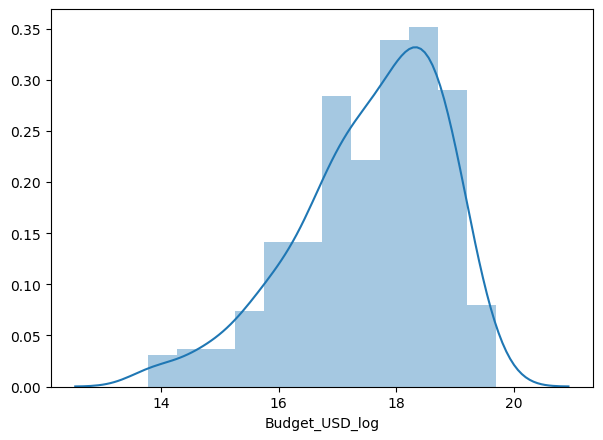

In [15]:
sns.distplot(df_raw.Budget_USD_log)
plt.show()

## Correlation between budget and rating?

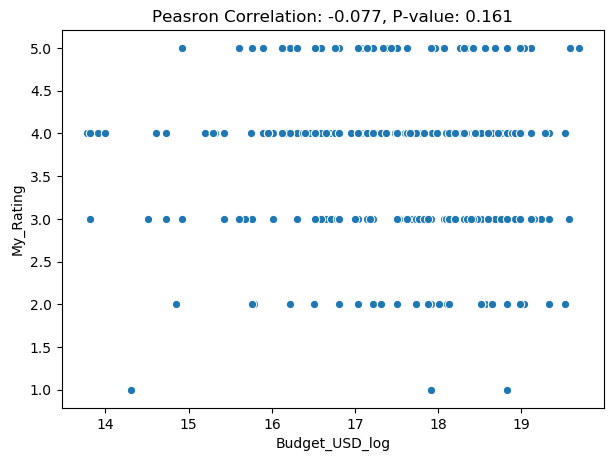

In [16]:
sns.scatterplot(x='Budget_USD_log', y='My_Rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw[~df_raw.Budget_USD_log.isnull()].Budget_USD_log,
                         df_raw[~df_raw.Budget_USD_log.isnull()].My_Rating))
plt.show()

# Cumulative Worldwide Gross

In [17]:
df_raw.loc[:, 'Gross_USD'] = df_raw.Cumulative_Worldwide_Gross.str.replace(',|\s.*|[^\d\W]|\$', '').astype(float)
df_raw.loc[:, 'Gross_USD_log'] = np.log(df_raw.Gross_USD)

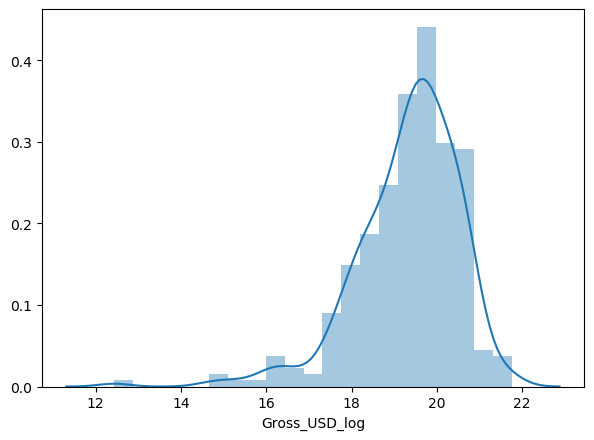

In [18]:
sns.distplot(df_raw.Gross_USD_log)
plt.show()

## Correlation between box office and rating?

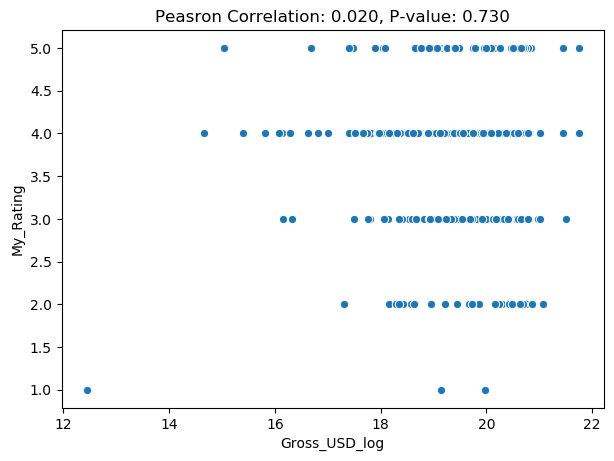

In [19]:
sns.scatterplot(x='Gross_USD_log', y='My_Rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw[~df_raw.Gross_USD_log.isnull()].Gross_USD_log,
                         df_raw[~df_raw.Gross_USD_log.isnull()].My_Rating))
plt.show()

# How many directors?

In [20]:
directors_set = set(df_raw.Director1)
len(directors_set)

205

In [21]:
top_directors = list(df_raw.Director1.value_counts().index[df_raw.Director1.value_counts()>2])
top_directors

['Steven Spielberg',
 'Christopher Nolan',
 'Quentin Tarantino',
 'David Yates',
 'David Fincher',
 'M. Night Shyamalan',
 'George Lucas',
 'Robert Zemeckis',
 'Todd Phillips',
 'Ridley Scott',
 'Chris Columbus',
 'Guy Hamilton',
 'Guillermo del Toro',
 'Ron Howard',
 'Peter Jackson',
 'Wes Anderson',
 'Terence Young',
 'Jon Favreau',
 'Michael Bay',
 'Richard Linklater',
 'Gore Verbinski',
 'Pete Docter',
 'Denis Villeneuve',
 'Paul Greengrass',
 'Adam McKay',
 'Steven Soderbergh',
 'Brad Bird',
 'Stanley Kubrick',
 'Anthony Russo',
 'Shawn Levy',
 'James Cameron',
 'Martin Scorsese',
 'John Lasseter',
 'Bong Joon Ho']

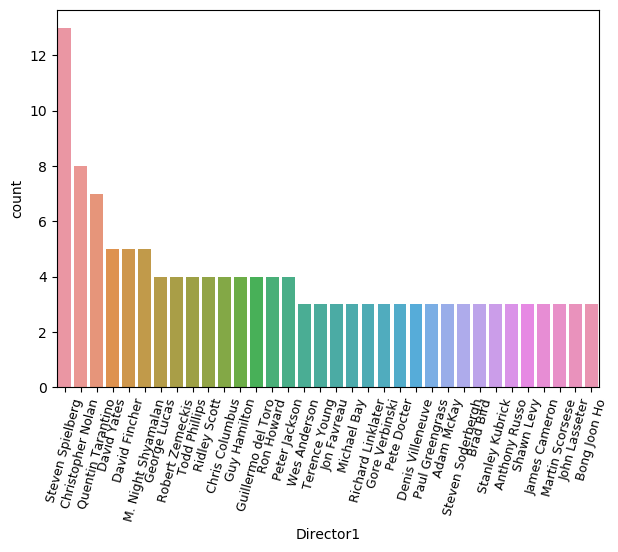

In [22]:
sns.countplot(df_raw.Director1, order=top_directors)
plt.xticks(fontsize=9, rotation=75)
plt.show()

# How many writers?

In [23]:
writers_all = pd.concat((df_raw.Writer1, df_raw.Writer2)).reset_index(drop=True)
writers_set = set(writers_all)
len(writers_set)

412

In [24]:
top_writers = list(writers_all.value_counts().index[writers_all.value_counts()>2])
top_writers

['George Lucas',
 'J.K. Rowling',
 'Quentin Tarantino',
 'Steve Kloves',
 'Christopher Nolan',
 'Richard Maibaum',
 'Andrew Stanton',
 'John Hughes',
 'Neal Purvis',
 'Tony Gilroy',
 'Guillermo del Toro',
 'Pete Docter',
 'Jonathan Nolan',
 'Lawrence Kasdan',
 'M. Night Shyamalan',
 'Roald Dahl',
 'David Koepp',
 'Ted Elliott',
 'Bong Joon Ho',
 'John Lasseter',
 'Fran Walsh',
 'Seth Rogen',
 'Ian Fleming',
 'Mark Bomback',
 'Michael Bacall',
 'Christopher Markus',
 'Bruce Geller',
 'Tim Herlihy',
 'Stephen McFeely',
 'Wes Anderson',
 'Joel Coen',
 'Terry Rossio',
 'J.R.R. Tolkien',
 'Ethan Coen',
 'Evan Goldberg',
 'Stanley Kubrick',
 'James Cameron',
 'Will Ferrell',
 'Akiva Goldsman',
 'Jon Spaihts',
 'Michael Crichton',
 'Jonathan Hensleigh',
 'Adam McKay',
 'Adam Sandler',
 'Tom Mankiewicz']

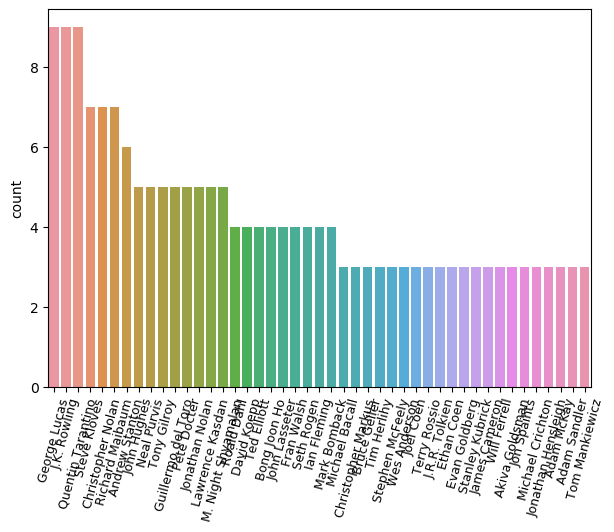

In [25]:
sns.countplot(writers_all, order=top_writers)
plt.xticks(fontsize=9, rotation=75)
plt.show()

# Year

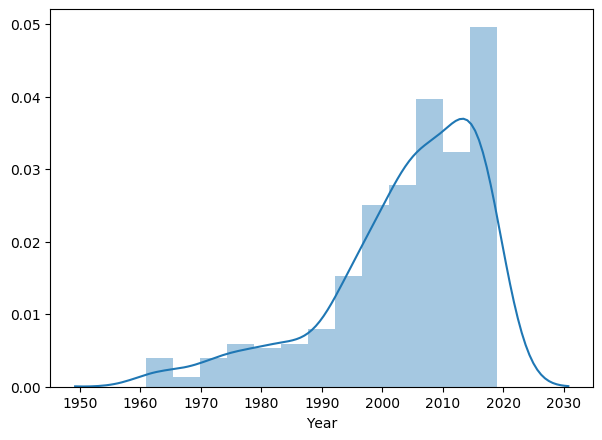

In [26]:
sns.distplot(df_raw.Year)
plt.show()

## Correlation between year and rating?

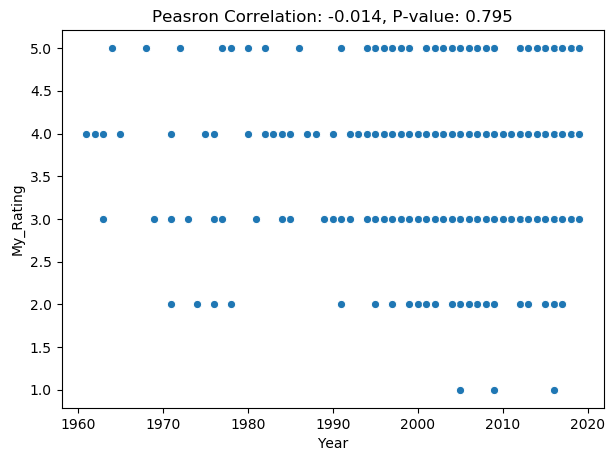

In [27]:
sns.scatterplot(x='Year', y='My_Rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.Year, df_raw.My_Rating))
plt.show()